In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data=pd.read_csv(r'D:\DATA\BRCA.csv')

In [3]:
data

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(341, 16)

In [8]:
data['HER2 status'].value_counts()

Negative    305
Positive     29
Name: HER2 status, dtype: int64

In [11]:
data.drop_duplicates(inplace=True) 

In [14]:
data.shape

(335, 16)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [16]:
data.isna().sum()

Patient_ID             1
Age                    1
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           1
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

In [17]:
data['Gender'].replace('MALE',0,inplace=True)
data['Gender'].replace('FEMALE',1,inplace=True)

In [18]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [19]:

data['Tumour_Stage'].value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [20]:
data[data['Tumour_Stage'].isna()]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,58.886228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.loc[334,'Tumour_Stage']='II'

In [22]:
data.isna().sum()

Patient_ID             1
Age                    0
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           0
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

In [23]:
data['PR status'].value_counts()

Positive    334
Name: PR status, dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    float64
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [27]:
data['Patient_ID'].value_counts()

TCGA-A1-A0SQ    1
TCGA-AO-A0JD    1
TCGA-E2-A15M    1
TCGA-BH-A0BF    1
TCGA-A7-A3J0    1
               ..
TCGA-A7-A4SB    1
TCGA-B6-A40B    1
TCGA-GM-A5PX    1
TCGA-A8-A06P    1
TCGA-BH-A0DP    1
Name: Patient_ID, Length: 317, dtype: int64

In [28]:
data.drop('Patient_ID',axis=1,inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    float64
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(6), object(9)
memory usage: 39.6+ KB


In [30]:
data['Tumour_Stage'].replace('I',1,inplace=True)
data['Tumour_Stage'].replace('II',2,inplace=True)
data['Tumour_Stage'].replace('III',3,inplace=True)

In [31]:
data['ER status'].value_counts()

Positive    317
Name: ER status, dtype: int64

In [32]:
(data['PR status']==data['ER status']).sum()

317

In [33]:
data.drop('ER status',axis=1,inplace=True)

In [34]:
le=preprocessing.LabelEncoder()
data.loc[:,['PR status']]=le.fit_transform(data.loc[:,['PR status']].values)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    float64
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    int64  
 7   Histology           317 non-null    object 
 8   PR status           317 non-null    int32  
 9   HER2 status         317 non-null    object 
 10  Surgery_type        317 non-null    object 
 11  Date_of_Surgery     317 non-null    object 
 12  Date_of_Last_Visit  317 non-null    object 
 13  Patient_Status      317 non-null    object 
dtypes: float64(6), int32(1), int64(1), object(6)
memory usage: 35.9+ KB


In [36]:
data['Patient_Status'].value_counts()

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

In [37]:
data['Patient_Status'].replace('Alive',1,inplace=True)
data['Patient_Status'].replace('Dead',0,inplace=True)

In [38]:
data['HER2 status'].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

In [39]:
data['HER2 status'].replace('Negative',0,inplace=True)
data['HER2 status'].replace('Positive',1,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    float64
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    int64  
 7   Histology           317 non-null    object 
 8   PR status           317 non-null    int32  
 9   HER2 status         317 non-null    int64  
 10  Surgery_type        317 non-null    object 
 11  Date_of_Surgery     317 non-null    object 
 12  Date_of_Last_Visit  317 non-null    object 
 13  Patient_Status      317 non-null    int64  
dtypes: float64(6), int32(1), int64(3), object(4)
memory usage: 35.9+ KB


In [41]:
data['Surgery_type'].value_counts()

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

In [42]:
data['Histology'].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [43]:
le=preprocessing.LabelEncoder()
data.loc[:,['Surgery_type']]=le.fit_transform(data.loc[:,['Surgery_type']].values)

In [44]:
le=preprocessing.LabelEncoder()
data.loc[:,['Histology']]=le.fit_transform(data.loc[:,['Histology']].values)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    float64
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    int64  
 7   Histology           317 non-null    int32  
 8   PR status           317 non-null    int32  
 9   HER2 status         317 non-null    int64  
 10  Surgery_type        317 non-null    int32  
 11  Date_of_Surgery     317 non-null    object 
 12  Date_of_Last_Visit  317 non-null    object 
 13  Patient_Status      317 non-null    int64  
dtypes: float64(6), int32(3), int64(3), object(2)
memory usage: 33.4+ KB


## splitting date column into day,month,year

In [46]:
data[["dayDOS", "monthDOS","yearDOS"]]= data["Date_of_Surgery"].str.split("-", expand = True)
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,dayDOS,monthDOS,yearDOS
0,36.0,1.0,0.080353,0.42638,0.54715,0.273680,3,0,0,0,1,15-Jan-17,19-Jun-17,1,15,Jan,17
1,43.0,1.0,-0.420320,0.57807,0.61447,-0.031505,2,2,0,0,0,26-Apr-17,09-Nov-18,0,26,Apr,17
2,69.0,1.0,0.213980,1.31140,-0.32747,-0.234260,3,0,0,0,2,08-Sep-17,09-Jun-18,1,08,Sep,17
3,56.0,1.0,0.345090,-0.21147,-0.19304,0.124270,2,0,0,0,1,25-Jan-17,12-Jul-17,1,25,Jan,17
4,56.0,1.0,0.221550,1.90680,0.52045,-0.311990,2,0,0,0,2,06-May-17,27-Jun-19,0,06,May,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,1.0,0.231800,0.61804,-0.55779,-0.517350,3,0,0,1,3,11-Nov-19,09-Feb-20,0,11,Nov,19
330,44.0,0.0,0.732720,1.11170,-0.26952,-0.354920,2,1,0,0,2,01-Nov-19,04-Mar-20,0,01,Nov,19
331,61.0,1.0,-0.719470,2.54850,-0.15024,0.339680,2,0,0,0,0,11-Nov-19,18-Jan-21,0,11,Nov,19
332,79.0,1.0,0.479400,2.05590,-0.53136,-0.188480,1,0,0,1,0,21-Nov-19,19-Feb-21,0,21,Nov,19


In [47]:
data[['dayDOLV','monthDOLV','yearDOLV']]=data['Date_of_Last_Visit'].str.split('-',expand=True)
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,dayDOS,monthDOS,yearDOS,dayDOLV,monthDOLV,yearDOLV
0,36.0,1.0,0.080353,0.42638,0.54715,0.273680,3,0,0,0,1,15-Jan-17,19-Jun-17,1,15,Jan,17,19,Jun,17
1,43.0,1.0,-0.420320,0.57807,0.61447,-0.031505,2,2,0,0,0,26-Apr-17,09-Nov-18,0,26,Apr,17,09,Nov,18
2,69.0,1.0,0.213980,1.31140,-0.32747,-0.234260,3,0,0,0,2,08-Sep-17,09-Jun-18,1,08,Sep,17,09,Jun,18
3,56.0,1.0,0.345090,-0.21147,-0.19304,0.124270,2,0,0,0,1,25-Jan-17,12-Jul-17,1,25,Jan,17,12,Jul,17
4,56.0,1.0,0.221550,1.90680,0.52045,-0.311990,2,0,0,0,2,06-May-17,27-Jun-19,0,06,May,17,27,Jun,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,1.0,0.231800,0.61804,-0.55779,-0.517350,3,0,0,1,3,11-Nov-19,09-Feb-20,0,11,Nov,19,09,Feb,20
330,44.0,0.0,0.732720,1.11170,-0.26952,-0.354920,2,1,0,0,2,01-Nov-19,04-Mar-20,0,01,Nov,19,04,Mar,20
331,61.0,1.0,-0.719470,2.54850,-0.15024,0.339680,2,0,0,0,0,11-Nov-19,18-Jan-21,0,11,Nov,19,18,Jan,21
332,79.0,1.0,0.479400,2.05590,-0.53136,-0.188480,1,0,0,1,0,21-Nov-19,19-Feb-21,0,21,Nov,19,19,Feb,21


In [48]:
le=preprocessing.LabelEncoder()
data.loc[:,['monthDOS']]=le.fit_transform(data.loc[:,['monthDOS']].values)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [49]:
le=preprocessing.LabelEncoder()
data.loc[:,['monthDOLV']]=le.fit_transform(data.loc[:,['monthDOLV']].values)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    float64
 1   Gender              317 non-null    float64
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    int64  
 7   Histology           317 non-null    int32  
 8   PR status           317 non-null    int32  
 9   HER2 status         317 non-null    int64  
 10  Surgery_type        317 non-null    int32  
 11  Date_of_Surgery     317 non-null    object 
 12  Date_of_Last_Visit  317 non-null    object 
 13  Patient_Status      317 non-null    int64  
 14  dayDOS              317 non-null    object 
 15  monthDOS            317 non-null    int32  
 16  yearDOS 

In [51]:
data.drop('Date_of_Surgery',axis=1,inplace=True)

In [52]:
data.drop('Date_of_Last_Visit',axis=1,inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    float64
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int32  
 8   PR status       317 non-null    int32  
 9   HER2 status     317 non-null    int64  
 10  Surgery_type    317 non-null    int32  
 11  Patient_Status  317 non-null    int64  
 12  dayDOS          317 non-null    object 
 13  monthDOS        317 non-null    int32  
 14  yearDOS         317 non-null    object 
 15  dayDOLV         317 non-null    object 
 16  monthDOLV       317 non-null    int32  
 17  yearDOLV        317 non-null    obj

In [54]:
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,PR status,HER2 status,Surgery_type,Patient_Status,dayDOS,monthDOS,yearDOS,dayDOLV,monthDOLV,yearDOLV
0,36.0,1.0,0.080353,0.42638,0.54715,0.273680,3,0,0,0,1,1,15,4,17,19,6,17
1,43.0,1.0,-0.420320,0.57807,0.61447,-0.031505,2,2,0,0,0,0,26,0,17,09,9,18
2,69.0,1.0,0.213980,1.31140,-0.32747,-0.234260,3,0,0,0,2,1,08,11,17,09,6,18
3,56.0,1.0,0.345090,-0.21147,-0.19304,0.124270,2,0,0,0,1,1,25,4,17,12,5,17
4,56.0,1.0,0.221550,1.90680,0.52045,-0.311990,2,0,0,0,2,0,06,8,17,27,6,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,1.0,0.231800,0.61804,-0.55779,-0.517350,3,0,0,1,3,0,11,9,19,09,3,20
330,44.0,0.0,0.732720,1.11170,-0.26952,-0.354920,2,1,0,0,2,0,01,9,19,04,7,20
331,61.0,1.0,-0.719470,2.54850,-0.15024,0.339680,2,0,0,0,0,0,11,9,19,18,4,21
332,79.0,1.0,0.479400,2.05590,-0.53136,-0.188480,1,0,0,1,0,0,21,9,19,19,3,21


## casting dayDOS column to from str to int

In [55]:
data=data.astype({'dayDOS':'int'})
data=data.astype({'yearDOS':'int'})

In [56]:
data=data.astype({'dayDOLV':'int'})
data=data.astype({'yearDOLV':'int'})

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             317 non-null    float64
 1   Gender          317 non-null    float64
 2   Protein1        317 non-null    float64
 3   Protein2        317 non-null    float64
 4   Protein3        317 non-null    float64
 5   Protein4        317 non-null    float64
 6   Tumour_Stage    317 non-null    int64  
 7   Histology       317 non-null    int32  
 8   PR status       317 non-null    int32  
 9   HER2 status     317 non-null    int64  
 10  Surgery_type    317 non-null    int32  
 11  Patient_Status  317 non-null    int64  
 12  dayDOS          317 non-null    int32  
 13  monthDOS        317 non-null    int32  
 14  yearDOS         317 non-null    int32  
 15  dayDOLV         317 non-null    int32  
 16  monthDOLV       317 non-null    int32  
 17  yearDOLV        317 non-null    int

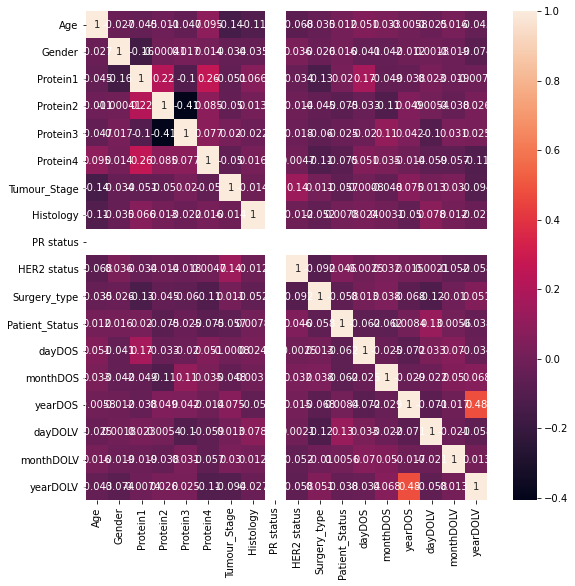

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [59]:
data.drop('PR status',axis=1,inplace=True)

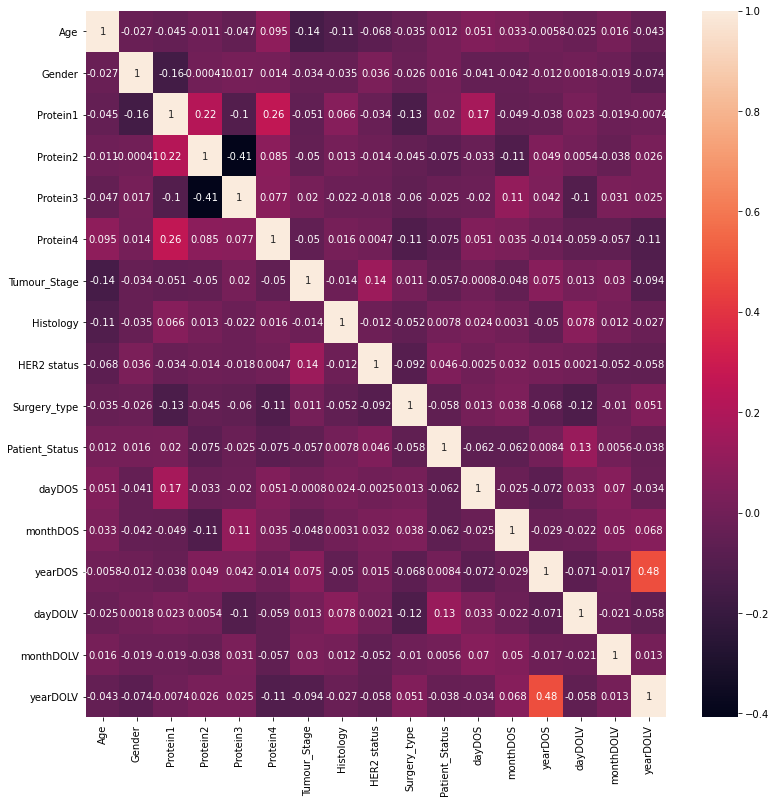

In [60]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True)
plt.show()

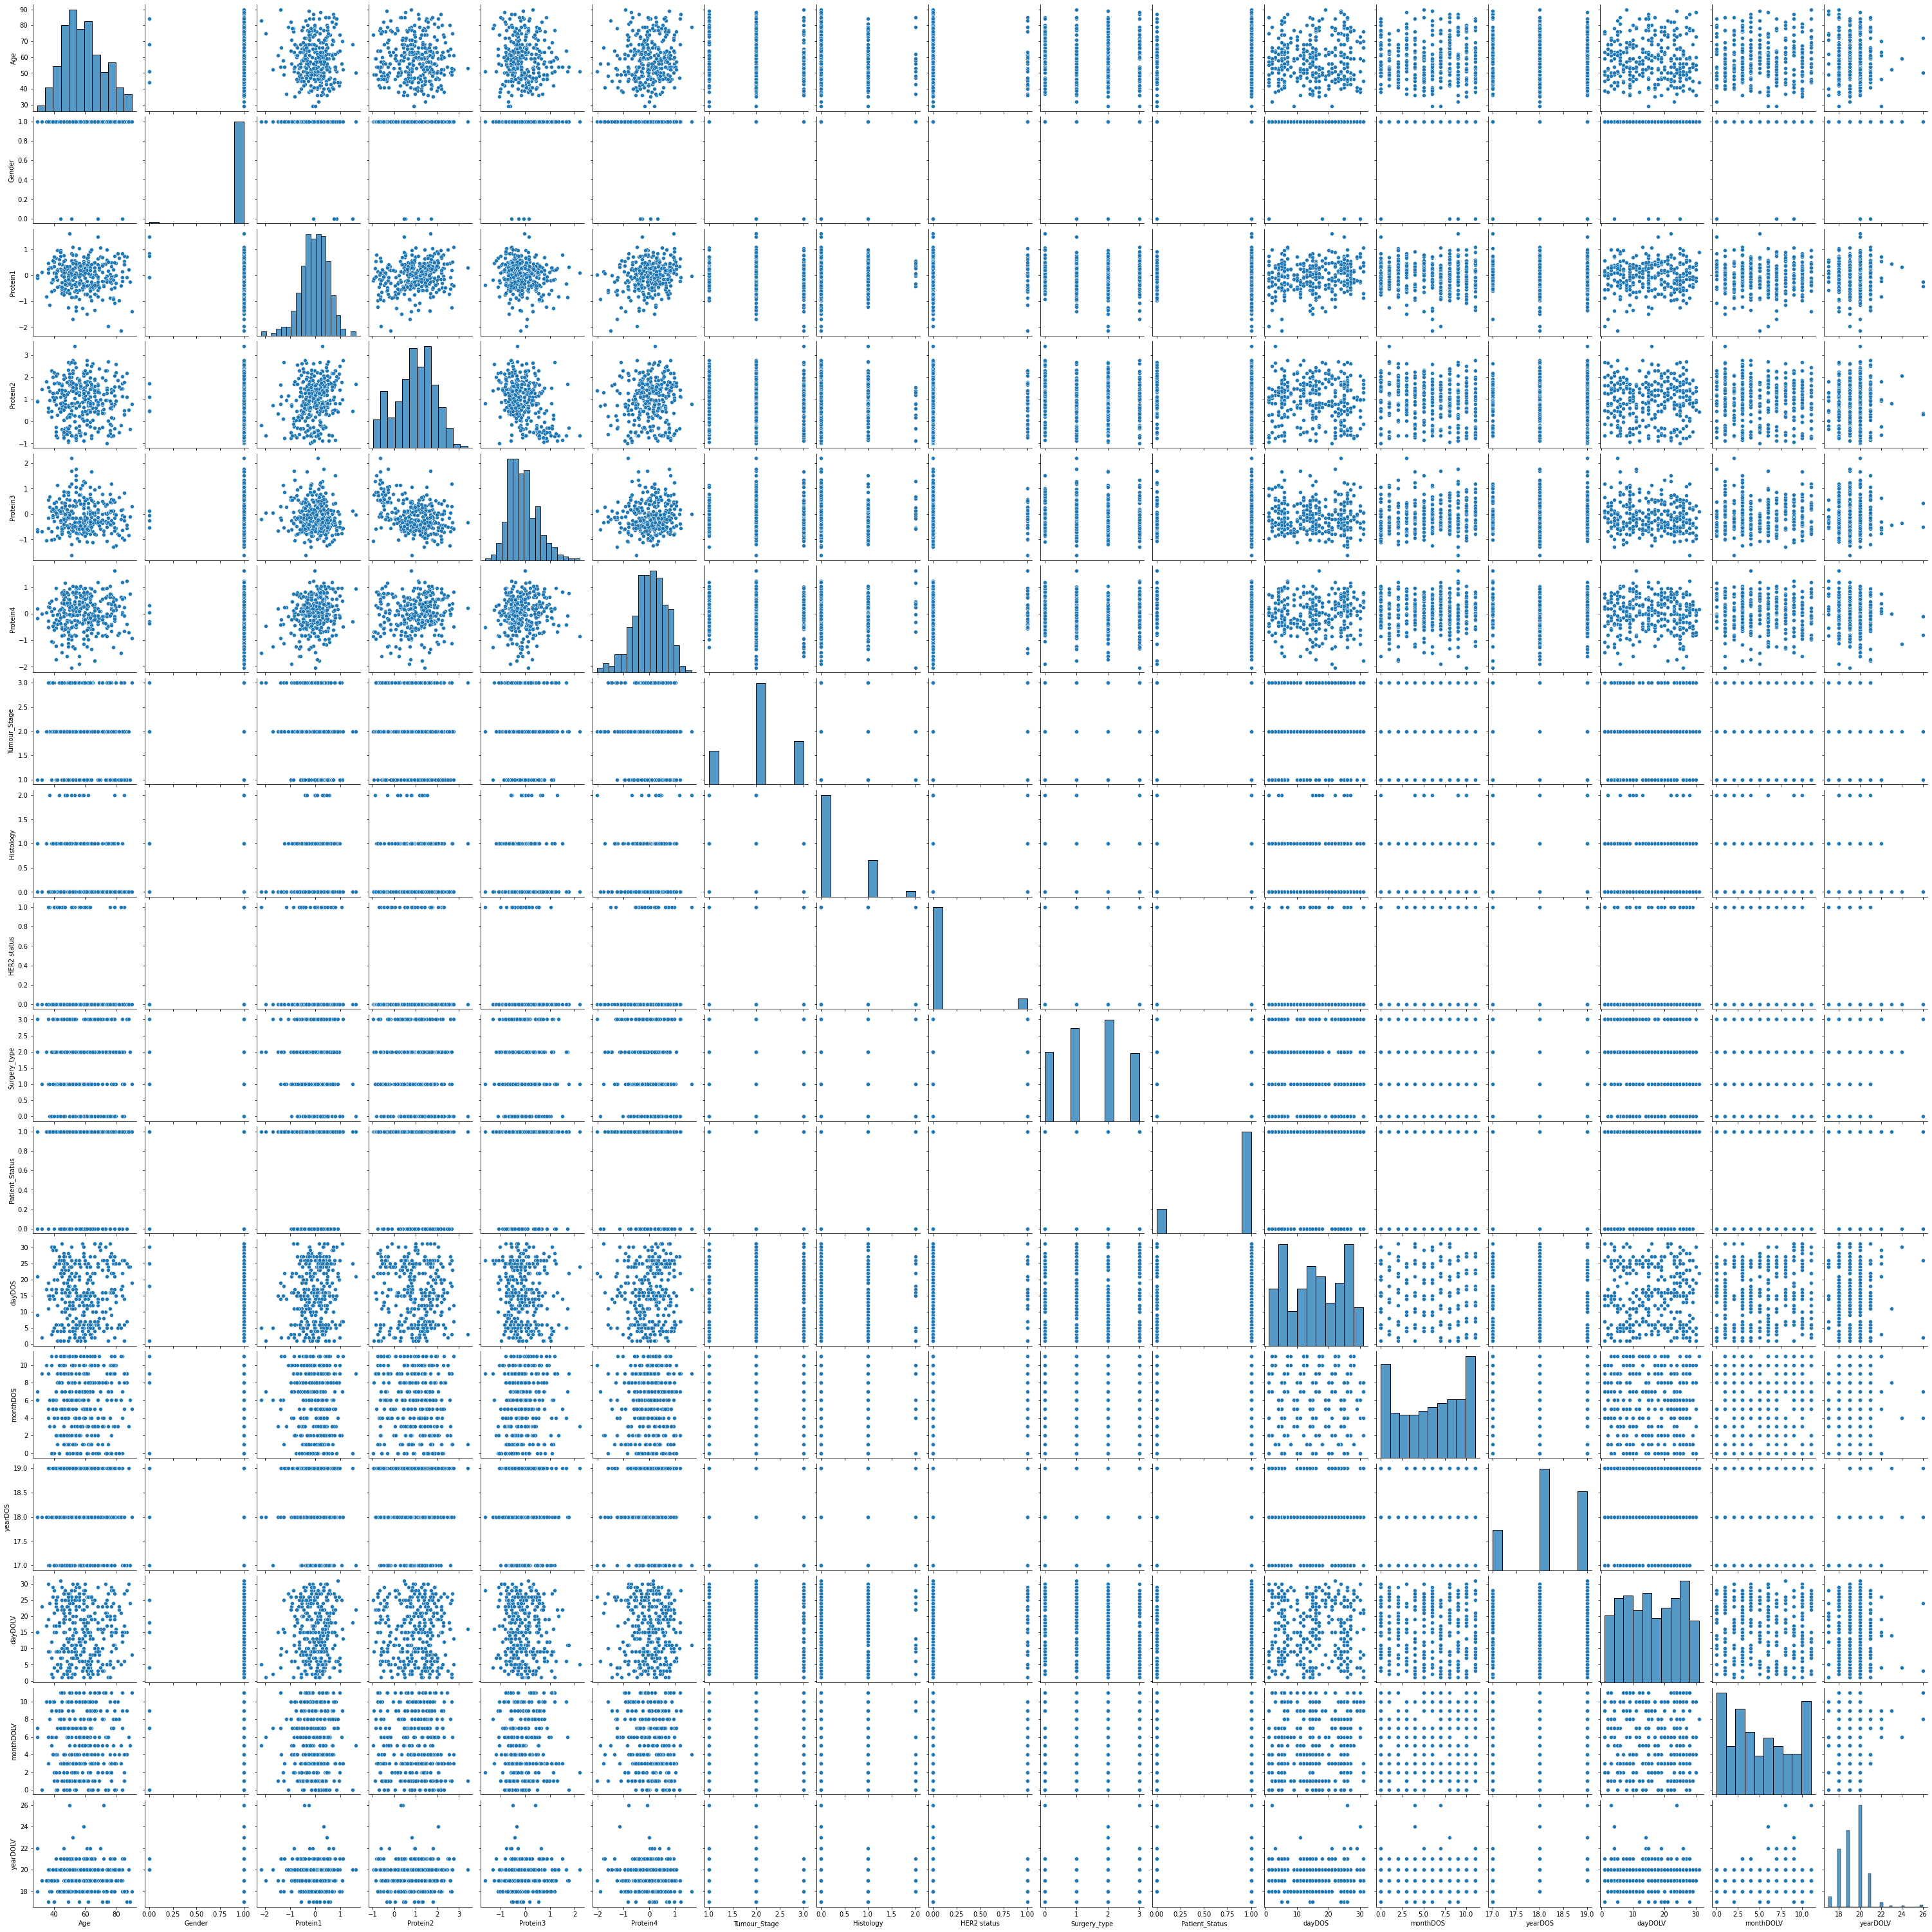

In [61]:
sns.pairplot(data)

## changing order of target column

In [62]:
data=data.reindex(['Age','Gender','Protein1','Protein2','Protein3','Tumour_Stage','Histology','HER2 status','Surgery_type','dayDOS','monthDOS','yearDOS','dayDOLV','monthDOLV','yearDOLV','Patient_Status'],axis=1)

In [63]:
data

,Age,Gender,Protein1,Protein2,Protein3,Tumour_Stage,Histology,HER2 status,Surgery_type,dayDOS,monthDOS,yearDOS,dayDOLV,monthDOLV,yearDOLV,Patient_Status
0,36.0,1.0,0.080353,0.42638,0.54715,3,0,0,1,15,4,17,19,6,17,1
1,43.0,1.0,-0.420320,0.57807,0.61447,2,2,0,0,26,0,17,9,9,18,0
2,69.0,1.0,0.213980,1.31140,-0.32747,3,0,0,2,8,11,17,9,6,18,1
3,56.0,1.0,0.345090,-0.21147,-0.19304,2,0,0,1,25,4,17,12,5,17,1
4,56.0,1.0,0.221550,1.90680,0.52045,2,0,0,2,6,8,17,27,6,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,1.0,0.231800,0.61804,-0.55779,3,0,1,3,11,9,19,9,3,20,0
330,44.0,0.0,0.732720,1.11170,-0.26952,2,1,0,2,1,9,19,4,7,20,0
331,61.0,1.0,-0.719470,2.54850,-0.15024,2,0,0,0,11,9,19,18,4,21,0
332,79.0,1.0,0.479400,2.05590,-0.53136,1,0,1,0,21,9,19,19,3,21,0


## splitting data and linear Regression

In [64]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)

In [66]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
train_x=sd.fit_transform(train_x)
test_x=sd.transform(test_x)

In [67]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [68]:
y_pred=model.predict(test_x)
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
mean_squared_error(test_y,y_pred)

0.11068573329752082

In [70]:
r2_score(test_y,y_pred)

-0.3027838034099002

## Count plot

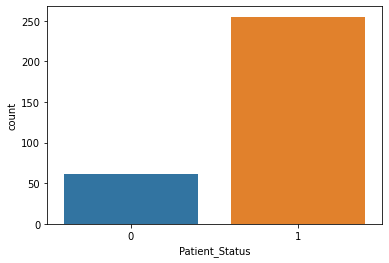

In [71]:
sns.countplot(x='Patient_Status',data=data)
plt.show()

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [73]:
y_pred=model.predict(test_x)

## Confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,test_y))

[[ 0  0]
 [ 3 29]]


## precision,recall,accuracy,f1_score

In [75]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score
print('Accuracy:',accuracy_score(test_y,y_pred))
print('Recall:',recall_score(test_y,y_pred))
print('Precision:',precision_score(test_y,y_pred))
print('F1 score:',f1_score(test_y,y_pred))

Accuracy: 0.90625
Recall: 1.0
Precision: 0.90625
F1 score: 0.9508196721311475
